In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
import os
import glob
import shutil
import itertools
import warnings
from sklearn.metrics import confusion_matrix

In [2]:
os.getcwdb ()

F:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


b'C:\\Users\\Faramarz\\Desktop\\Keras Practice'

# Making files in my directory

In [3]:
os.chdir('cat-dog')
if os.path.isdir('train\dog') is False:
    os.makedirs('train\dog')
    os.makedirs('train\cat')
    os.makedirs('valid\dog')
    os.makedirs('valid\cat')
    os.makedirs('test\dog')
    os.makedirs('test\cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train\dog')
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train\cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid\dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid\cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test\dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test\cat')
os.chdir('C:\\Users\\Faramarz\\Desktop\\Keras Practice')

In [4]:
train_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\train'
valid_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\valid'
test_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\test'

In [5]:
train_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
valid_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
test_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batch.n==1000
assert valid_batch.n==200
assert test_batch.n==100
assert train_batch.num_classes==valid_batch.num_classes==test_batch.num_classes==2

In [7]:
img,labels=next(train_batch)

In [8]:
def plot_images(image):
    fig,axis=plt.subplots(1,10, figsize=(20,20))
    axis=axis.flatten()
    for img,ax in zip(image,axis):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [9]:
#plot_images(img)

In [15]:
#print(labels)

In [11]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers import Activation, Dense, Flatten , Conv2D, MaxPool2D

# Pridict

In [30]:
def plot_confusion(cm,classes,normilize=False,title='Confusion Matrix', cmap=plt.cm.Accent):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normilize:
        cm=cm.astype('float')/cm.sum(axis=1)[: , np.newaxis]
        print('Normilized Confusion Matrix')
    else:
        print('Without Normalization')
        
    print(cm)
    thresh=cm.max()/2.
    for j,i in itertools.product(range (cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j,cm[i,j],
                color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import plot_confusion_matrix

In [13]:
vgg16_model=keras.applications.vgg16.VGG16()

In [16]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

# Converting to Sequential model

In [17]:
model=keras.Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [18]:
for layer in model.layers:
    layer.trainable=False

In [19]:
model.add(Dense(units=2, activation='softmax'))

In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy'
             ,metrics=['accuracy'],)

In [23]:
model.fit(x=train_batch, validation_data=valid_batch, epochs=1, verbose=2, steps_per_epoch=50
          , validation_steps=10)

50/50 - 534s - loss: 0.0960 - accuracy: 0.9780 - val_loss: 0.0809 - val_accuracy: 0.9800


In [45]:
prediction=model.predict(x=test_batch, verbose=0)

In [46]:
np.argmax(prediction,axis=-1)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [49]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
cm=confusion_matrix(y_true=test_batch.classes, y_pred=np.argmax(prediction,axis=-1))

Without Normalization
[[25 25]
 [25 25]]


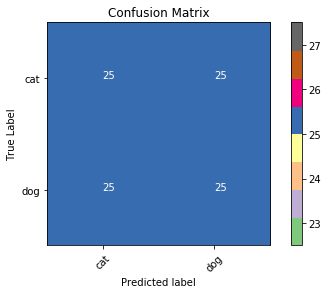

In [51]:
plot_confusion(cm=cm,classes=['cat','dog'])